# Real-Time Face Mask Detection

### Import all the libraries and modules required.

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint

from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import cv2

### Build the neural network

In [3]:
model = Sequential([
    Conv2D(256, (3,3), activation='tanh', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

### Image Data Generation/Augmentation

In [4]:
# C:\Users\prati\Desktop\python project face mask tool\dataset\face-mask\Train
TRAINING_DIR = r"C:\Users\prati\Desktop\python project face mask tool\dataset\face-mask\Train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=32, 
                                                    target_size=(150, 150))
VALIDATION_DIR = r"C:\Users\prati\Desktop\python project face mask tool\dataset\face-mask\Test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=32, 
                                                         target_size=(150, 150))

Found 4301 images belonging to 2 classes.
Found 1590 images belonging to 2 classes.


### Initialize a callback checkpoint to keep saving best model after each epoch while training:

In [4]:
checkpoint = ModelCheckpoint('.\model3lyr\mask_model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

### Train the model: 

In [5]:
history = model.fit(train_generator,epochs=32,validation_data=validation_generator,callbacks=[checkpoint])

Epoch 1/10
 19/135 [===>..........................] - ETA: 1:07 - loss: 0.7152 - acc: 0.5510

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - ETA: 0s - loss: 0.5132 - acc: 0.7449

INFO:tensorflow:Assets written to: .\model1101\mask_model-001.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-001.model\assets


135/135 [==============================] - 119s 783ms/step - loss: 0.5132 - acc: 0.7449 - val_loss: 0.2134 - val_acc: 0.9352
Epoch 2/10
  3/135 [..............................] - ETA: 1:21 - loss: 0.3595 - acc: 0.8646

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - ETA: 0s - loss: 0.3710 - acc: 0.8498

INFO:tensorflow:Assets written to: .\model1101\mask_model-002.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-002.model\assets


135/135 [==============================] - 108s 796ms/step - loss: 0.3710 - acc: 0.8498 - val_loss: 0.1962 - val_acc: 0.9371
Epoch 3/10
 86/135 [==================>...........] - ETA: 31s - loss: 0.3552 - acc: 0.8594

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - 93s 681ms/step - loss: 0.3493 - acc: 0.8612 - val_loss: 0.2183 - val_acc: 0.9164
Epoch 4/10
135/135 [==============================] - ETA: 0s - loss: 0.3437 - acc: 0.8638

INFO:tensorflow:Assets written to: .\model1101\mask_model-004.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-004.model\assets


135/135 [==============================] - 99s 736ms/step - loss: 0.3437 - acc: 0.8638 - val_loss: 0.1917 - val_acc: 0.9547
Epoch 5/10
 28/135 [=====>........................] - ETA: 1:11 - loss: 0.3194 - acc: 0.8694

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - ETA: 0s - loss: 0.3209 - acc: 0.8726

INFO:tensorflow:Assets written to: .\model1101\mask_model-005.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-005.model\assets


135/135 [==============================] - 101s 748ms/step - loss: 0.3209 - acc: 0.8726 - val_loss: 0.1876 - val_acc: 0.9465
Epoch 6/10
 33/135 [======>.......................] - ETA: 1:03 - loss: 0.3149 - acc: 0.8785

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - ETA: 0s - loss: 0.3235 - acc: 0.8751

INFO:tensorflow:Assets written to: .\model1101\mask_model-006.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-006.model\assets


135/135 [==============================] - 99s 733ms/step - loss: 0.3235 - acc: 0.8751 - val_loss: 0.1660 - val_acc: 0.9547
Epoch 7/10
 10/135 [=>............................] - ETA: 1:19 - loss: 0.3165 - acc: 0.8687

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - 92s 677ms/step - loss: 0.3063 - acc: 0.8754 - val_loss: 0.2210 - val_acc: 0.9491
Epoch 8/10
135/135 [==============================] - ETA: 0s - loss: 0.3012 - acc: 0.8856

INFO:tensorflow:Assets written to: .\model1101\mask_model-008.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-008.model\assets


135/135 [==============================] - 100s 737ms/step - loss: 0.3012 - acc: 0.8856 - val_loss: 0.1342 - val_acc: 0.9642
Epoch 9/10
 11/135 [=>............................] - ETA: 1:22 - loss: 0.2618 - acc: 0.8892

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - 92s 677ms/step - loss: 0.3010 - acc: 0.8791 - val_loss: 0.1365 - val_acc: 0.9497
Epoch 10/10
135/135 [==============================] - ETA: 0s - loss: 0.2876 - acc: 0.8872

INFO:tensorflow:Assets written to: .\model1101\mask_model-010.model\assets


INFO:tensorflow:Assets written to: .\model1101\mask_model-010.model\assets


135/135 [==============================] - 99s 732ms/step - loss: 0.2876 - acc: 0.8872 - val_loss: 0.1285 - val_acc: 0.9635


In [5]:
history = model.fit(train_generator,epochs=32,validation_data=validation_generator)

Epoch 1/32
 37/135 [=======>......................] - ETA: 59s - loss: 0.6329 - acc: 0.6554 

D:\ProgramData\Anaconda3\envs\tflow-gpu\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - 106s 685ms/step - loss: 0.4818 - acc: 0.7817 - val_loss: 0.2298 - val_acc: 0.9308
Epoch 2/32
135/135 [==============================] - 92s 678ms/step - loss: 0.3641 - acc: 0.8554 - val_loss: 0.1972 - val_acc: 0.9434
Epoch 3/32
135/135 [==============================] - 92s 680ms/step - loss: 0.3546 - acc: 0.8551 - val_loss: 0.1896 - val_acc: 0.9484
Epoch 4/32
135/135 [==============================] - 91s 674ms/step - loss: 0.3334 - acc: 0.8696 - val_loss: 0.1691 - val_acc: 0.9447
Epoch 5/32
135/135 [==============================] - 91s 674ms/step - loss: 0.3046 - acc: 0.8796 - val_loss: 0.2310 - val_acc: 0.9289
Epoch 6/32
135/135 [==============================] - 92s 680ms/step - loss: 0.3046 - acc: 0.8833 - val_loss: 0.1464 - val_acc: 0.9516
Epoch 7/32
135/135 [==============================] - 91s 674ms/step - loss: 0.3018 - acc: 0.8828 - val_loss: 0.1473 - val_acc: 0.9535
Epoch 8/32
135/135 [==============================] - 91s 672ms/s

Text(0.5, 1.0, 'Training and validation loss')

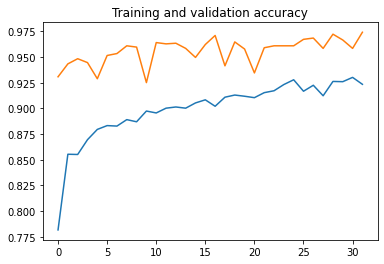

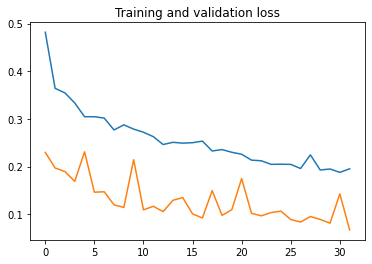

In [6]:
from matplotlib import pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

plt.plot(epochs,acc)

plt.plot(epochs,val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and validation loss'   )

In [7]:
model.save('mask_detector_with_cudnn_3_layers_32+epoch.model')

INFO:tensorflow:Assets written to: mask_detector_with_cudnn_3_layers_32+epoch.model\assets


INFO:tensorflow:Assets written to: mask_detector_with_cudnn_3_layers_32+epoch.model\assets


### Test the results of face mask detector model using OpenCV

In [2]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("./mask_detector_with_cudnn_3_layers_32+epoch.model")

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


#haarcascade = cv2.CascadeClassifier('/home/user_name/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2.imshow('LIVE', im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

1/1 [==============================] - 0s 52ms/step
